### Problem Deutscha

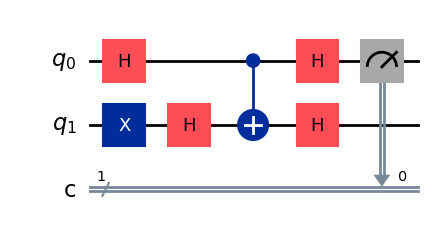

In [22]:
from qiskit import QuantumCircuit
import warnings
warnings.filterwarnings("ignore")
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService
import numpy as np

qc = QuantumCircuit(2, 1)
qc.x(1)
qc.h(0)
qc.h(1)
qc.cx(0, 1)
qc.h(0)
qc.h(1)
qc.measure(0, 0)
qc.draw('mpl')

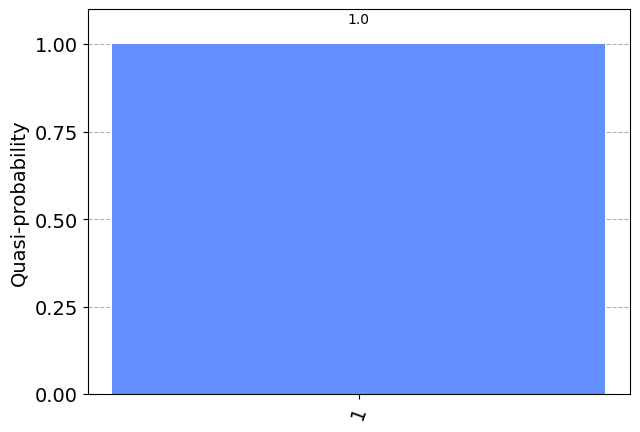

In [24]:
service = QiskitRuntimeService()
backend=service.backend('ibmq_qasm_simulator')
from qiskit_ibm_runtime import  Batch, Sampler
with Batch(service=service, backend=backend):
    sampler = Sampler()
    job = sampler.run(
        circuits=[qc],
        shots=100,
    )
    result_sim = job.result()
plot_histogram(result_sim.quasi_dists[0].binary_probabilities())

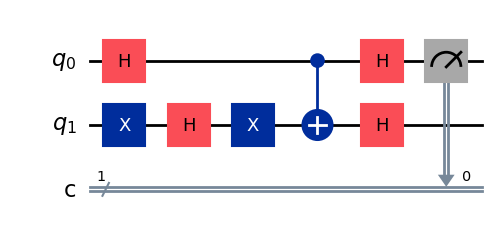

In [27]:
qc = QuantumCircuit(2, 1)
qc.x(1)
qc.h(0)
qc.h(1)
qc.x(1)
qc.cx(0, 1)
qc.h(0)
qc.h(1)
qc.measure(0, 0)
qc.draw('mpl')

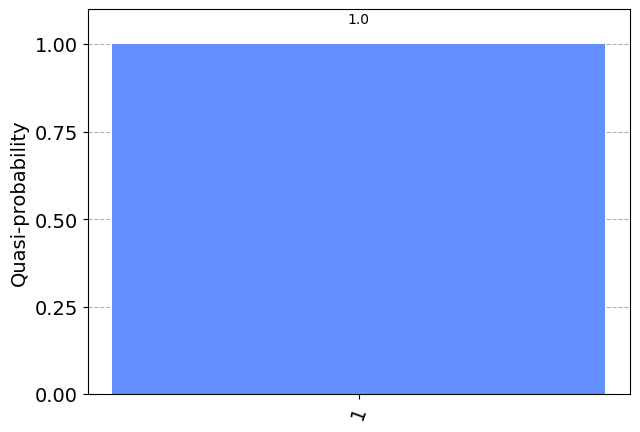

In [28]:
service = QiskitRuntimeService()
backend=service.backend('ibmq_qasm_simulator')
from qiskit_ibm_runtime import  Batch, Sampler
with Batch(service=service, backend=backend):
    sampler = Sampler()
    job = sampler.run(
        circuits=[qc],
        shots=100,
    )
    result_sim = job.result()
plot_histogram(result_sim.quasi_dists[0].binary_probabilities())

Problem Deutcha polega na tym, aby zminimalizować liczbę zapytań do funkcji, aby ustalić, czy jest ona stała czy zrównoważona

Bramki obliczeniowe Uf są wykorzystywane do symulacji funkcji, które chcemy sprawdzić. Istnieją cztery możliwe bramki obliczeniowe które można podzielić na stałe i zmienne.

Wynik problemu Deutcha znajduje się na kubicie wejściowym. Jeśli wynik wynosi 0, oznacza to, że funkcja jest stała, natomiast wynik 1 wskazuje na to, że funkcja jest zrównoważona.

### Problem Bersteina-Vaziraniego

In [15]:
def classical_solution():
    secret_number = 101
    num_bits = secret_number.bit_length()
    query = 0
    for i in range(num_bits):
        if (secret_number >> i) & 1:
            query |= (1 << i)
    print(query)

classical_solution()

101


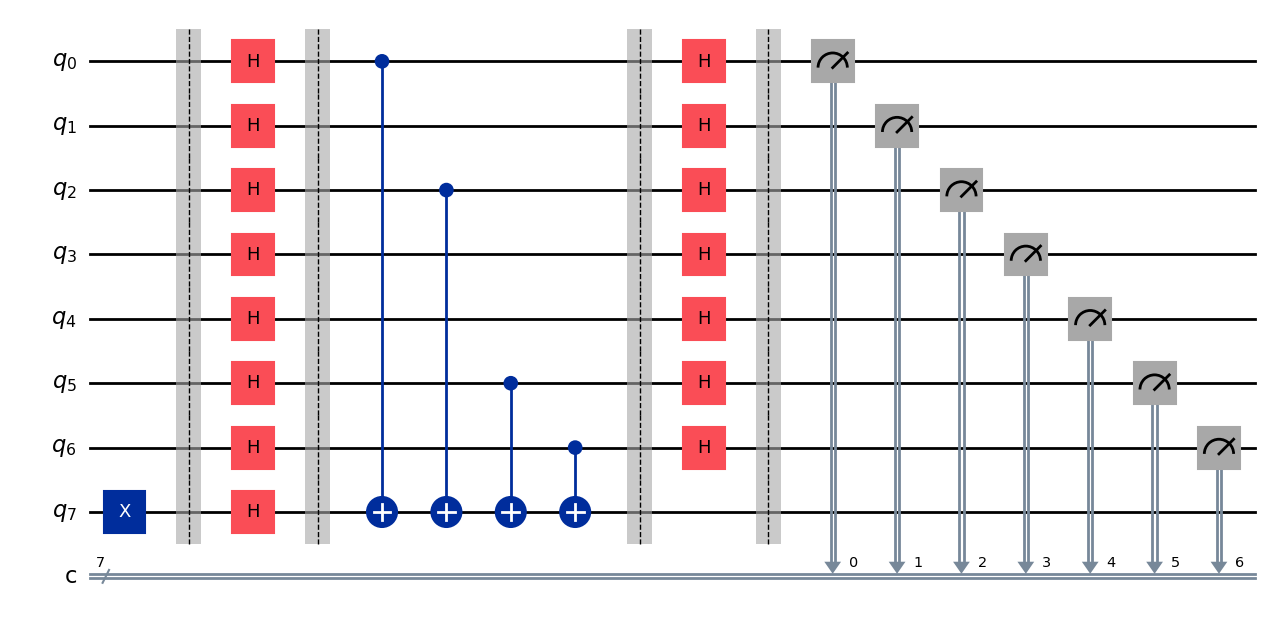

In [29]:
secret_number = 101
num_bits = secret_number.bit_length()
qc = QuantumCircuit(num_bits + 1, num_bits)
qc.x(num_bits)
qc.barrier()
for i in range(num_bits + 1):
    qc.h(i)
qc.barrier()
for i in range(num_bits):
    if (secret_number >> i) & 1:
        qc.cx(i, num_bits)

qc.barrier()
for i in range(num_bits):
    qc.h(i)

qc.barrier()
for i in range(num_bits):
    qc.measure(i, i)
qc.draw('mpl')


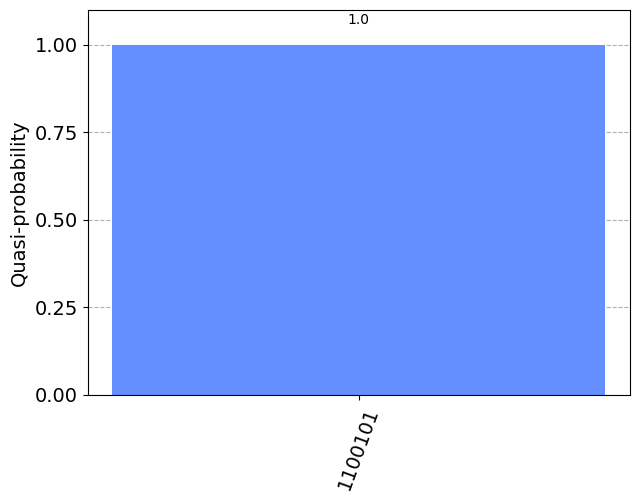

In [30]:
with Batch(service=service, backend=backend):
    sampler = Sampler()
    job = sampler.run(
        circuits=[qc],
        shots=100,
    )
    result_sim = job.result()
plot_histogram(result_sim.quasi_dists[0].binary_probabilities())


Problem Bernsteina-Vaziraniego polega na zdeterminowaniu liczby dla funkcji o n bitach wejściowych.

Konkretnie, mamy funkcję f(x), gdzie x to n-bitowe wejście, a f to n-bitowe wyjście. Naszym celem jest znalezienie tajnej liczby s, która determinuje tę funkcję, tzn. f(x)=x⋅smod2n, gdzie ⋅ oznacza iloczyn skalarny modulo 2. 

Bramka obliczeniowa Uf w problemie Bernsteina-Vaziraniego realizuje funkcję f(x) w obwodzie kwantowym (w tym przypadku, działa jako bramka unitarna).

Rozwiązanie klasyczne: W rozwiązaniu klasycznym, aby poznać tajną liczbę s, musimy przeprowadzić n zapytań do funkcji f(x), gdzie każde zapytanie zawiera różne bity dla x. Następnie, korzystając z wyników tych zapytań, możemy odtworzyć s poprzez wykonywanie operacji algebraicznych. Wynik klasycznego algorytmu Bernsteina-Vaziraniego można uzyskać poprzez obserwację wartości bitów s po przeprowadzeniu odpowiednich zapytań do funkcji f(x). W przypadku klasycznego podejścia, wynik ten uzyskujemy w pamięci komputera.

Rozwiązanie kwantowe: W rozwiązaniu kwantowym, używając algorytmu Bernsteina-Vaziraniego, możemy znaleźć tajną liczbę s przy użyciu jednej iteracji obwodu kwantowego. Używając bramek kwantowych, takich jak bramka Hadamarda i bramka Uf, oraz wykorzystując zjawisko interferencji kwantowej, możemy uzyskać wynik złożoności obliczeniowej O(1), co jest znacznie bardziej efektywne niż klasyczne podejście. W rozwiązaniu kwantowym, wynik uzyskujemy poprzez pomiar ostatnich n kubitów po wykonaniu obwodu kwantowego. Wynik ten będzie reprezentacją binarną tajnej liczby s.